<a href="https://colab.research.google.com/github/dnjhaha/AML/blob/master/CS680Assign3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Danni Jin CS680 assignment #3
**This dataset describes the medical records for Pima Indians and whether or not each patient will have an onset of diabetes.**

**The first thing we'll need to do is load in the libraries we'll be using.**


In [0]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier


**We have to read in the CSV file that is from the github. We'll use a package called pandas for that. Take a first look at the data.**

In [0]:
# load dataset
url = "https://raw.githubusercontent.com/dnjhaha/AML/master/datasets/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
diabete = pandas.read_csv(url, names=names)
# Visualise a table with the first rows of the dataset, to
# better understand the data format
diabete.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


**Because the dataset don't contain the column name, so we can define the column name by use function names=['',etc.]. then put the csv file and column name together.**

**Fields description follow:
preg = Number of times pregnant.
plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
pres = Diastolic blood pressure (mm Hg).
skin = Triceps skin fold thickness (mm).
test = 2-Hour serum insulin (mu U/ml).
mass = Body mass index (weight in kg/(height in m)^2).
pedi = Diabetes pedigree function.
age = Age (years).
class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes).**

**Statistics Summary：Find out the nature of data**

In [0]:
diabete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [0]:
diabete.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#The type of dataset and problem is a classic supervised binary classification. 
**Given a number of elements all with certain characteristics (features).The last column:class of the dataset indicates if the person has been diagnosed with diabetes (1) or not (0).**

**Scatterplot Matrix**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


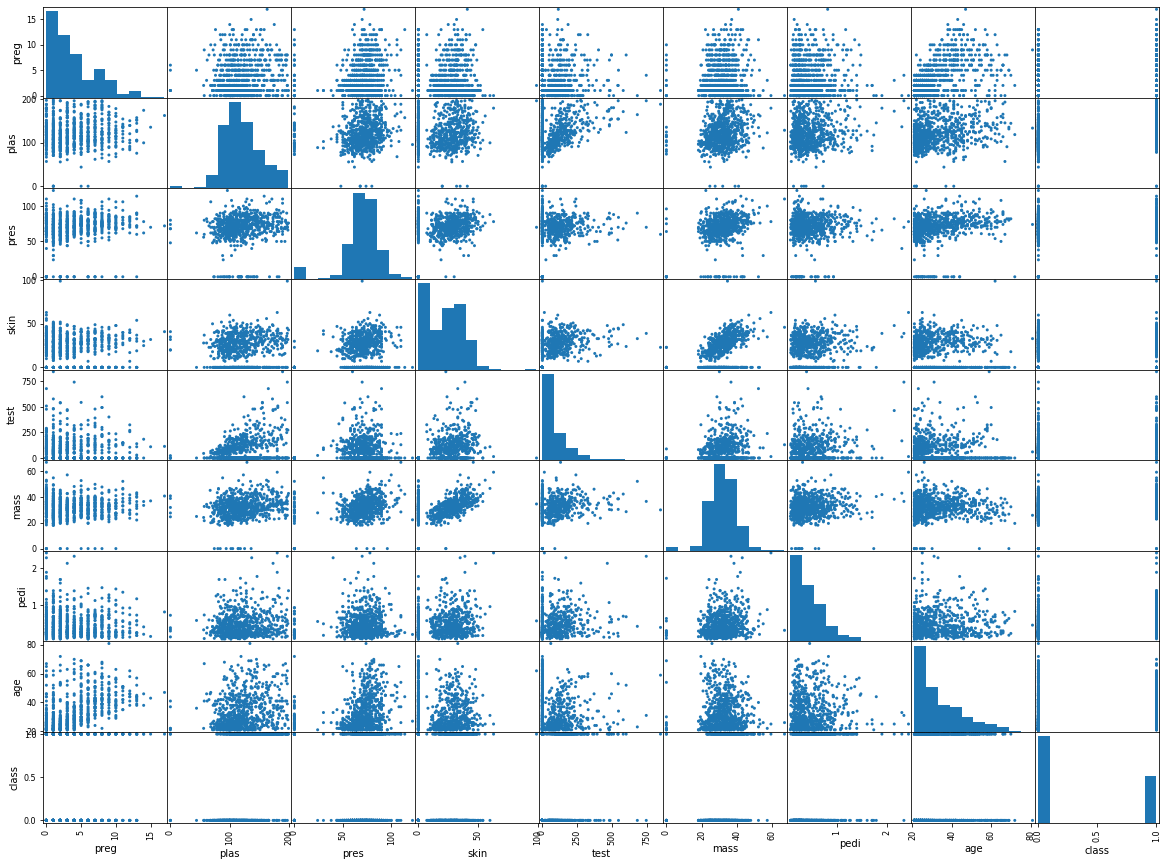

In [0]:
# Scatterplot Matrix
import matplotlib.pyplot as plt
import pandas
from pandas.plotting import scatter_matrix
fig, ax = plt.subplots(figsize=(20,15))
scatter_matrix(diabete,alpha=1, ax=ax)
plt.show()

**Data correlation matrix**

**The correlation matrix is an important tool to understand the correlation between the different characteristics. The values range from -1 to 1 and the closer a value is to 1 the bettere correlation there is between two characteristics. Let's calculate the correlation matrix for our dataset.**

In [0]:
corr_matrix = diabete.corr()
print(corr_matrix['class'].sort_values(ascending=False))

class    1.000000
plas     0.466581
mass     0.292695
age      0.238356
preg     0.221898
pedi     0.173844
test     0.130548
skin     0.074752
pres     0.065068
Name: class, dtype: float64


**From the result, I can see that the plas is the most relative reason with the patient whether it has the diabetes or not.**

**Create a heat map**

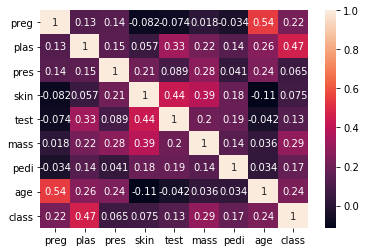

In [0]:
sns.heatmap(diabete.corr(), annot=True)

**Visualise the Dataset**

**Visualising the data is an important step of the data analysis. With a graphical visualisation of the data we have a better understanding of the various features values distribution: for example we can understand what's the average age of the people or the average BMI etc...
We could of course limit our inspection to the table visualisation, but we could miss important things that may affect our model precision.**

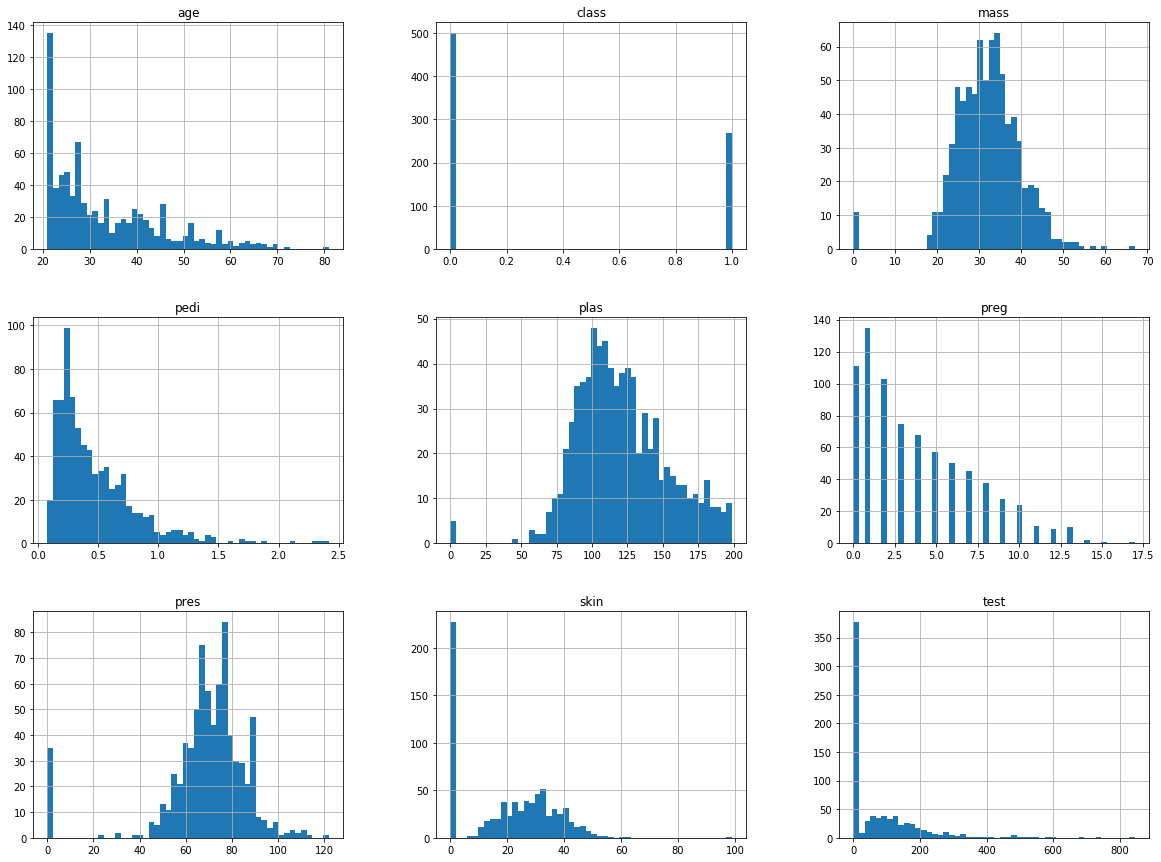

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
diabete.hist(bins=50, figsize=(20,15))
plt.show()

**An important thing I notice in the dataset (and that wasn't obvious at the beginning) is the fact that some people have null (zero) values for some of the features: it's not quite possible to have 0 as Body mass index or for the blood pressure.**

# Data cleaning and transformation
**We have noticed from the previous analysis that some patients have missing data information for some of the features. Machine learning algorithms don't work very well when the data is missing so we have to find a solution to "clean" the data we have.
The easiest option could be to eliminate all those patients with null/zero values, but in this way we would eliminate a lot of important data.
Another option is to calculate the median value for a specific column and substitute that value everywhere (in the same column) we have zero or null. Let's see how to apply this second method.**

In [0]:
# Calculate the median value for BMI
median_mass = diabete['mass'].median()
# Substitute it in the BMI column of the
# dataset where values are 0
diabete['mass'] =diabete['mass'].replace(to_replace=0, value=median_mass)

In [0]:
# Calculate the median value for BloodP
median_pres = diabete['pres'].median()
# Substitute it in the BloodP column of the
# dataset where values are 0
diabete['pres'] = diabete['pres'].replace(to_replace=0, value=median_pres)

In [0]:
# Calculate the median value for PlGlcConc
median_plas = diabete['plas'].median()
# Substitute it in the PlGlcConc column of the
# dataset where values are 0
diabete['plas'] = diabete['plas'].replace(to_replace=0, value=median_plas)

In [0]:
# Calculate the median value for SkinThick
median_skin = diabete['skin'].median()
# Substitute it in the SkinThick column of the
# dataset where values are 0
diabete['skin'] = diabete['skin'].replace(to_replace=0, value=median_skin)

In [0]:
# Calculate the median value for TwoHourSerIns
median_test = diabete['test'].median()
# Substitute it in the TwoHourSerIns column of the
# dataset where values are 0
diabete['test']= diabete['test'].replace(to_replace=0, value=median_test)

**I haven't transformed all the columns, because for some values can make sense to be zero (like "Number of times pregnant").**

In [0]:
diabete.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Splitting the Dataset
Now that we have transformed the data we need to split the dataset in two parts: a training dataset and a test dataset. Splitting the dataset is a very important step for supervised machine learning models. Basically we are going to use the first part to train the model (ignoring the column with the pre assigned label), then we use the trained model to make predictions on new data (which is the test dataset, not part of the training set) and compare the predicted value with the pre assigned label.

In [0]:
# Split the training dataset in 80% / 20%
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(diabete, test_size=0.2, random_state=42)

In [0]:
# Separate labels from the rest of the dataset
train_set_labels = train_set["class"].copy()
train_set = train_set.drop("class", axis=1)
test_set_labels = test_set["class"].copy()
test_set = test_set.drop("class", axis=1)

# Feature Scaling
One of the most important data transformations we need to apply is the features scaling. Basically most of the machine learning algorithms don't work very well if the features have a different set of values. In our case for example the Age ranges from 21 to 81 years old, while the number of times a patient has been pregnant ranges from 0 to 17. For this reason we need to apply a proper transformation.

In [0]:
# Apply a scaler
from sklearn.preprocessing import MinMaxScaler as Scaler
scaler = Scaler()
scaler.fit(train_set)
train_set_scaled = scaler.transform(train_set)
test_set_scaled = scaler.transform(test_set)

**Scaled Values**

In [0]:
df = pandas.DataFrame(data=train_set_scaled)
df.head()

,0,1,2,3,4,5,6,7
0,0.117647,0.258065,0.489796,0.272727,0.019832,0.282209,0.096499,0.000000
1,0.529412,0.438710,0.591837,0.290909,0.019832,0.204499,0.514091,0.483333
2,0.058824,0.612903,0.224490,0.200000,0.082933,0.214724,0.245944,0.016667
3,0.000000,0.754839,0.265306,0.272727,0.019832,0.075665,0.075149,0.733333
4,0.352941,0.580645,0.571429,0.527273,0.427885,0.572597,0.068318,0.416667


# Select and train a model
It's not possible to know in advance which algorithm will work better with our dataset. We need to compare a few and select the one with the "best score".


In [0]:
# Import the slearn utility to compare algorithms
from sklearn import model_selection

**Comparing multiple algorithms
To compare multiple algorithms with the same dataset, there is a very nice utility in sklearn called model_selection. We create a list of algorithms and then we score them using the same comparison method. At the end we pick the one with the best score.**

In [0]:
# Prepare an array with all the algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('RFC', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))

In [0]:
# Prepare the configuration to run the test
seed = 7
results = []
names = []
X = train_set_scaled
Y = train_set_labels

**The 10-fold cross validation** procedure is used to evaluate each algorithm, importantly configured with the same random seed to ensure that the same splits to the training data are performed and that each algorithms is evaluated in precisely the same way.

In [0]:
# Every algorithm is tested and results are
# collected and printed
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(
        model, X, Y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (
        name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

LR: 0.754019 (0.038302)
KNN: 0.740984 (0.049627)
NB: 0.739450 (0.062140)
SVC: 0.763749 (0.033309)
LDA: 0.762163 (0.042727)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RFC: 0.763802 (0.024653)
DT: 0.729667 (0.048425)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


**The picture provides a box and whisker plot showing the spread of the accuracy scores across each cross validation fold for each algorithm.**

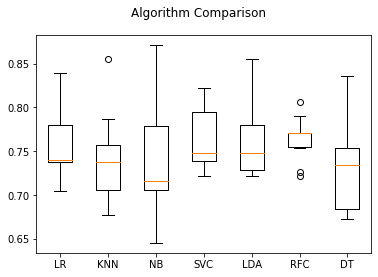

In [0]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)# create box-and-whisker plots of each result.
ax.set_xticklabels(names)
plt.show()

# Conclusion
**From the above graph, We finally find a score of 76.3802% using the RFC algorithm has the best performance. Here we all use the default parameter in each algorithm. However, the default parameters for an algorithm are rarely the best ones for our dataset. Using sklearn we can easily build a parameter grid and try all the possible combinations. Please note that there may be still space for further analysis and optimization, for example using artificial neural networks.**

**Logistic regression:**
 Logistic Regression is used when the dependent variable(target) is categorical.Types of Logistic Regression:1. Binary Logistic Regression.For example,To predict whether an email is spam (1) or (0).2. Multinomial Logistic Regression.Example: Predicting which food is preferred more (Veg, Non-Veg, Vegan)3. Ordinal Logistic Regression.Example: Movie rating from 1 to 5.

 Model:
Output = 0 or 1.
Hypothesis => Z = WX + B.
hΘ(x) = sigmoid (Z).
If ‘Z’ goes to infinity, Y(predicted) will become 1 and if ‘Z’ goes to negative infinity, Y(predicted) will become 0.
 **This case we should use binary logiostic regression.**

**Decision Trees:supervised learning algorithms.**
It can be used for solving **regression and classification** problems.Decision tree is derived from the independent variables, with each node having a condition over a feature.The nodes decides which node to navigate next based on the condition. Once the leaf node is reached, an output is predicted. The right sequence of conditions makes the tree efficient. entropy/Information gain are used as the criteria to select the conditions in nodes. A recursive, greedy based algorithm is used to derive the tree structure.two types:
1.Categorical Variable Decision Tree.2.Continuous Variable Decision Tree:

**Support Vector Machines** can be used for both regression and classification tasks. But, it is widely used in classification objectives. The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.Hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. Also, the dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane. It becomes difficult to imagine when the number of features exceeds 3.

**K-nearest neighbors**
K-nearest neighbors is a non-parametric method used for **classification and regression**. Basic Theory : The basic logic behind KNN is to explore your neighborhood, assume the test datapoint to be similar to them and derive the output. In KNN, we look for k neighbors and come up with the prediction.

**Linear Discriminant Analysis:**Linear Discriminant Analysis (LDA) is most commonly used as dimensionality reduction technique in the pre-processing step for pattern-classification and machine learning applications. The goal is to project a dataset onto a lower-dimensional space with good class-separability in order avoid overfitting (“curse of dimensionality”) and also reduce computational costs.
The general LDA approach is very similar to a Principal Component Analysis (for more information about the PCA, see the previous article Implementing a Principal Component Analysis (PCA) in Python step by step), but in addition to finding the component axes that maximize the variance of our data (PCA), we are additionally interested in the axes that maximize the separation between multiple classes (LDA).

It is possible to apply Artificial Neural Networks on this dataset.
Because diagnosis, estimation, and prediction
are main applications of **artificial neural networks.** Artificial
neural networks with their own data try to determine if a
person is patient or not. With diverse models of ANNs it is
possible to perform the diagnosis task on different diseases, so
we can address the issue of identifying the disease at the first
phase using different models of ANNs with reduced human related errors.In recent years, ANNs applied in all fields of medical sciences, and have been accepted by physician for both identifying the diseases and patient treatments. When using ANNs for identifying
diseases, the aim is to achieve a high accuracy rate, and
quality of diagnosis depends on training and testing a data set. 
**Bibliography:**https://pdfs.semanticscholar.org/8f86/5c00bcb58699c11093a4708e00d249042e92.pdf 

https://www.kaggle.com/htoukour/neural-networks-to-predict-diabetes
